In [1]:
!pip install large_image
!apt update && apt install -y openslide-tools
!pip install openslide-python
!pip install libtiff openslide_python pyvips gdal mapnik pyproj glymur -f https://girder.github.io/large_image_wheels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 KB 1.4 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 htt

In [2]:
pip install python-bioformats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 4.3 MB/s eta 0:00:00
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp39-cp39-linux_x86_64.whl size=1869852 sha256=803fead95b074e1a60dcdb0d7abdf4a42f6f67537dfbbed8dc6900d459510796
  Stored in directory: /root/.cache/pip/wheels/12/d1/a8/220b14c433cb8c37acbc36413f231d6bd796c14ad2d4da5f53
  Created wheel for future: filename=future-0

In [3]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Get metadata, show an image

In [4]:
import javabridge
import bioformats
javabridge.start_vm(class_path=bioformats.JARS)

In [5]:
import os

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float
from skimage.exposure import match_histograms, rescale_intensity
from skimage.io import imshow, imread
import cv2
import bioformats.formatreader as F
import random

%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['image.cmap'] = 'gray'

In [6]:
def img_read(self, x=0, y=0, z=0, width=1000, height=1000):
    img_path = self
    ImageReader = F.make_image_reader_class()
    reader = ImageReader()
    reader.setId(img_path)
    img = reader.openBytesXYWH(z, x, y, width, height)
    img.shape = (height, width, 3)

    return img
    # plt.imshow(img)  

In [18]:
# ndpi images

img_path = '/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C3/C3_ndpi/PAL1999_C3_sample43_slide1 - 2022-10-24 12.57.14.ndpi'
# img_path = '/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6/C6_ndpi/PAL1999_C6_sample1_slide2 - 2022-07-14 16.40.43.ndpi'
# img_path = '/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C3/C3_ndpi/PAL1999_C3_sample1_slide2 - 2022-08-18 15.35.43.ndpi'

In [19]:
omexml = bioformats.get_omexml_metadata(img_path)

In [20]:
b = bioformats.OMEXML(xml=omexml)

In [25]:
print(b)

<ome:OME xmlns:ome="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd"><ome:Instrument ID="Instrument:0"><ome:Microscope Model="C9600-12" /><ome:Objective ID="Objective:0:0" NominalMagnification="40.0" /></ome:Instrument><ome:Image ID="Image:0" Name="Series 1"><ome:AcquisitionDate>2022-10-24T12:57:52</ome:AcquisitionDate><ome:Description>120187</ome:Description><ome:InstrumentRef ID="Instrument:0" /><ome:ObjectiveSettings ID="Objective:0:0" /><ome:Pixels BigEndian="false" DimensionOrder="XYCZT" ID="Pixels:0" Interleaved="true" PhysicalSizeX="0.22507314877335133" PhysicalSizeXUnit="µm" PhysicalSizeY="0.22507314877335133" PhysicalSizeYUnit="µm" SignificantBits="8" SizeC="3" SizeT="1" SizeX="91264" SizeY="90880" SizeZ="9" Type="uint8"><ome:Channel ID="Channel:0:0" SamplesPerPixel="3"><ome:LightPath /></ome:Ch

In [22]:
metadata = {}
calibration = b.image().Pixels.PhysicalSizeX
calibration_unit = b.image().Pixels.PhysicalSizeXUnit
width = b.image().Pixels.SizeX
height = b.image().Pixels.SizeY
zPlane = b.image().Pixels.SizeZ

metadata.update({'calibration': calibration})
metadata.update({'calibration_unit': calibration_unit})
metadata.update({'width': width})
metadata.update({'height': height})
metadata.update({'zPlane': zPlane})
print(metadata)

{'calibration': 0.22507314877335133, 'calibration_unit': 'µm', 'width': 91264, 'height': 90880, 'zPlane': 9}


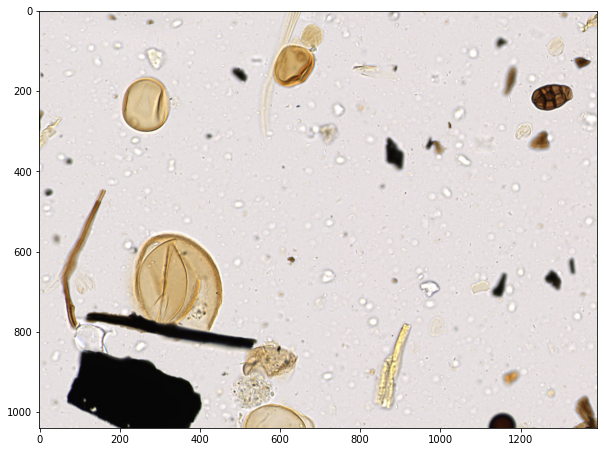

In [26]:
width = 1392
height = 1040

start_x_list = np.arange(0, metadata['width'] - width, width).tolist()
start_y_list = np.arange(0, metadata['height'] - height, height).tolist()

x = random.choice(start_x_list)
y = random.choice(start_y_list)

img = img_read(img_path, x=x, y=y, z=3, width = 1392, height = 1040).astype(np.float64)

img = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
img = img.astype(np.uint8)

plt.imshow(img)  

In [27]:
# total number of image stacks
# sample 300 random stacks

start_xy_list = []
for i in range(len(start_x_list)):
  for j in range(len(start_y_list)):
    x = start_x_list[i]
    y = start_y_list[j]
    xy = (x,y)
    start_xy_list.append(xy)

print(len(start_xy_list))
sample = random.sample(start_xy_list, 300)

5655


# Loop through and export crops

In [ ]:
# Loop through and crop tiles, export images
# Create new folder for crops with subfolders for each stack. 

In [ ]:
img_path.split('/')[-2].split('_')[0]

'C3'

In [ ]:
img_name = os.path.basename(img_path).split(' ')[0]
core_name = img_path.split('/')[-2].split('_')[0]
crops_dir = os.path.join('/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999', core_name, core_name + '_tiles', img_name + '_5')
# crops_dir = '/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6/C6_tiles_randomized'
if not os.path.exists(crops_dir): 
    os.makedirs(crops_dir)
print(img_name)
print(core_name)
print(crops_dir)

PAL1999_C3_sample43_slide1
C3
/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C3/C3_tiles/PAL1999_C3_sample43_slide1_5


In [ ]:
start_x_list = np.arange(0, metadata['width'] - width, width).tolist()
start_y_list = np.arange(0, metadata['height'] - height, height).tolist()
start_xy_list = []

for i in range(len(start_x_list)):
  for j in range(len(start_y_list)):
    x = start_x_list[i]
    y = start_y_list[j]
    xy = (x,y)
    start_xy_list.append(xy)

print(len(start_xy_list))
sample = random.sample(start_xy_list, 350)
print(sample)

5655
[(34800, 76960), (75168, 59280), (79344, 18720), (68208, 28080), (75168, 81120), (82128, 13520), (69600, 52000), (34800, 66560), (66816, 82160), (23664, 23920), (70992, 73840), (1392, 62400), (69600, 49920), (62640, 44720), (36192, 56160), (2784, 24960), (37584, 61360), (66816, 17680), (79344, 22880), (65424, 62400), (59856, 24960), (8352, 44720), (58464, 83200), (84912, 37440), (48720, 79040), (5568, 72800), (64032, 68640), (84912, 27040), (55680, 34320), (37584, 68640), (32016, 62400), (87696, 28080), (82128, 64480), (58464, 70720), (27840, 28080), (0, 5200), (64032, 35360), (89088, 5200), (12528, 28080), (27840, 44720), (69600, 21840), (9744, 15600), (9744, 48880), (5568, 12480), (43152, 18720), (20880, 24960), (45936, 17680), (48720, 23920), (37584, 26000), (23664, 45760), (77952, 73840), (18096, 52000), (22272, 84240), (58464, 55120), (82128, 7280), (8352, 74880), (47328, 0), (32016, 74880), (38976, 58240), (76560, 65520), (8352, 50960), (57072, 15600), (12528, 36400), (66816

In [ ]:
for i in tmp_img_list:
  start_xy_list.remove(i)

print(len(start_xy_list))

5420


In [ ]:
width = 1392
height = 1040

sample = random.sample(start_xy_list, 70)
for i in range(len(sample)):
    # start_x = randrange(metadata['width']-1392)
    # start_y = randrange(metadata['height']-1040)
    # start_x = random.choice(start_x_list)
    # start_y = random.choice(start_y_list)
    start_x = sample[i][0]
    start_y = sample[i][1]
    tile_dir = os.path.join(crops_dir, str(start_x) + 'x_' + str(start_y) + 'y')
    # if os.path.exists(tile_dir):
    #   continue
    if not os.path.exists(tile_dir): 
      os.makedirs(tile_dir)
    for j in range(zPlane):
    # for i in range(9):
      img = img_read(img_path, x=start_x, y=start_y, z=j,  width = width, height = height)
      im = Image.fromarray(img)
      im.save(os.path.join(tile_dir,  str(j) + 'z.png'))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [ ]:
start_x_list = np.arange(40000, 60000, 1392).tolist()
start_y_list = np.arange(40000, 60000, 1040).tolist()
for start_x in start_x_list:
    for start_y in start_y_list:
      tile_dir = os.path.join(crops_dir, str(start_x) + 'x_' + str(start_y) + 'y')
      if os.path.exists(tile_dir):
        continue
      if not os.path.exists(tile_dir): 
        os.makedirs(tile_dir)
      for i in range(zPlane):
      # for i in range(9):
        img = img_read(img_path, x=start_x, y=start_y, z=i,  width = width, height = height)
        im = Image.fromarray(img)
        im.save(os.path.join(tile_dir,  str(i) + 'z.png'))

In [ ]:
start_x_list = np.arange(40000, 60000, 1392).tolist()
start_y_list = np.arange(40000, 60000, 1040).tolist()
print(max(start_x_list))
print(max(start_y_list))

59488
59760


In [ ]:
print(len(start_y_list))

20
